# Personal Expense Tracker

### Overview
The main objective of the Personal Expense Tracker project is to create a comprehensive data-driven solution that enables users to monitor and analyze their spending habits. This project involves processing a realistic dataset of expenses, categorizing and visualizing transactions, and generating predictive insights on future spending patterns. The data and variables are crafted from the perspective of a student. The deliverables include a well-documented Jupyter Notebook containing Python-based exploratory data analysis (EDA), data cleaning, and predictive modeling, alongside interactive Excel dashboards to visualize monthly spending patterns. By applying data science techniques and business analysis skills, this project aims to provide valuable financial insights, making it easier for users to track expenses, optimize spending, and achieve savings goal.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Initial exploration

In [3]:
# Load the dataset
df = pd.read_csv('income_and_utilities_expense_tracker.csv')

In [6]:
# Display the first few rows of the dataset to get an overview
print("Initial Data Preview:")
df.head()

Initial Data Preview:


,Date,Category,Description,Amount
0,8/1/2022,Income,Income,1500.00
1,8/1/2022,Gym,Gym Membership,25.00
2,8/1/2022,Food,Groceries,71.14
3,8/1/2022,Transportation,Taxi,6.77
4,8/2/2022,Food,Groceries,89.42


In [7]:
# Get a summary of the dataset to understand column data types and any missing values
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         612 non-null    object 
 1   Category     612 non-null    object 
 2   Description  612 non-null    object 
 3   Amount       612 non-null    float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [8]:
# Generate basic statistics for numerical columns to understand the range and distribution of values
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Amount
count,612.000000
mean,129.691160
std,314.746086
min,0.000000
25%,9.570000
50%,38.290000
75%,103.570000
max,1500.000000


## 2. Data Cleaning
Objective: Convert the Date column to datetime format and check for any other potential data quality issues, such as duplicates.

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Using 'coerce' to handle any invalid dates

# Check for any rows where 'Date' conversion failed (NaT values)
invalid_dates = df[df['Date'].isna()]
if not invalid_dates.empty:
    print("Rows with invalid dates:")
    print(invalid_dates)

Since there are no invalid dates, there is no dropping

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         612 non-null    datetime64[ns]
 1   Category     612 non-null    object        
 2   Description  612 non-null    object        
 3   Amount       612 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 19.3+ KB


In [11]:
# Drop duplicates if any exist
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
final_row_count = df.shape[0]

# Report any duplicates found and removed
print(f"\nDuplicate rows removed: {initial_row_count - final_row_count}")


Duplicate rows removed: 0


In [13]:
# Sort the DataFrame by 'Date' in ascending order
df.sort_values(by='Date', inplace=True)

# Reset the index after sorting to keep the DataFrame tidy
df.reset_index(drop=True, inplace=True)

# Display the first few rows to confirm sorting
print("Data sorted by Date:")
print(df.head())

Data sorted by Date:
        Date        Category     Description   Amount
0 2022-08-01          Income          Income  1500.00
1 2022-08-01             Gym  Gym Membership    25.00
2 2022-08-01            Food       Groceries    71.14
3 2022-08-01  Transportation            Taxi     6.77
4 2022-08-02            Food       Groceries    89.42


### 3. Feature Engineering 
Objective: Extract new features from the existing data to gain deeper insights and enable more detailed analysis.
1. Extract DATE components
2. Categorize expenses as ESSENTIAL or NON-ESSENTIAL
3. Categorizing expenses into INCOME and EXPENSE

In [18]:
# Extracting date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()

# Categorizing expenses into Essential and Non-Essential
# Define essential descriptions
essential_descriptions = [
    'Rent', 'Electricity Bill', 'Groceries', 'Taxi', 
    'Internet Bill', 'Water Bill', 'Income'
]

# Add ExpenseType column based on description
df['ExpenseType'] = df['Description'].apply(lambda x: 'Essential' if x in essential_descriptions else 'Non-Essential')

# Categorizing expenses into Income and Expense
# Define income descriptions
income_descriptions = ['Income']

# Add AmountType column based on whether the description indicates income
df['AmountType'] = df['Description'].apply(lambda x: 'Income' if x in income_descriptions else 'Expense')

# Display the first few rows to confirm feature engineering
print("Data after updating ExpenseType & AmountType classification:")

df.head()


Data after updating ExpenseType & AmountType classification:


,Date,Category,Description,Amount,Year,Month,Day,DayOfWeek,ExpenseType,AmountType
0,2022-08-01,Income,Income,1500.00,2022,8,1,Monday,Essential,Income
1,2022-08-01,Gym,Gym Membership,25.00,2022,8,1,Monday,Non-Essential,Expense
2,2022-08-01,Food,Groceries,71.14,2022,8,1,Monday,Essential,Expense
3,2022-08-01,Transportation,Taxi,6.77,2022,8,1,Monday,Essential,Expense
4,2022-08-02,Food,Groceries,89.42,2022,8,2,Tuesday,Essential,Expense


## 4. Exploratory Data Analysis
Objective: Perform EDA to understand spending patterns, identify trends.

###  1. Income vs. Expense Overview

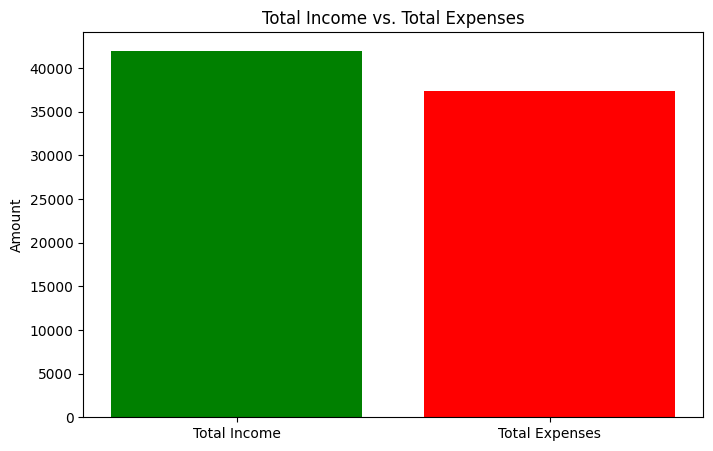

In [21]:
# Calculate total income and expenses
total_income = df[df['AmountType'] == 'Income']['Amount'].sum()
total_expenses = df[df['AmountType'] == 'Expense']['Amount'].sum()

# Plot Income vs. Expense
labels = ['Total Income', 'Total Expenses']
values = [total_income, total_expenses]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Total Income vs. Total Expenses')
plt.ylabel('Amount')
plt.show()

Insights from Income vs. Expense Overview

1. ##### Financial Health:
   Since Total Income exceeds Total Expenses, the individual might have saved a portion of their income.This indicates a generally balanced financial situation but may suggest limited discretionary spending flexibility if essential expenses consume most of the income.
   
2. ##### Expense Optimization:
   This view highlights the need to investigate spending patterns in more detail to understand which categories consume the most expenses. By optimizing non-essential expenses, the user could increase their savings further.

### 2. Monthly Spending Trends

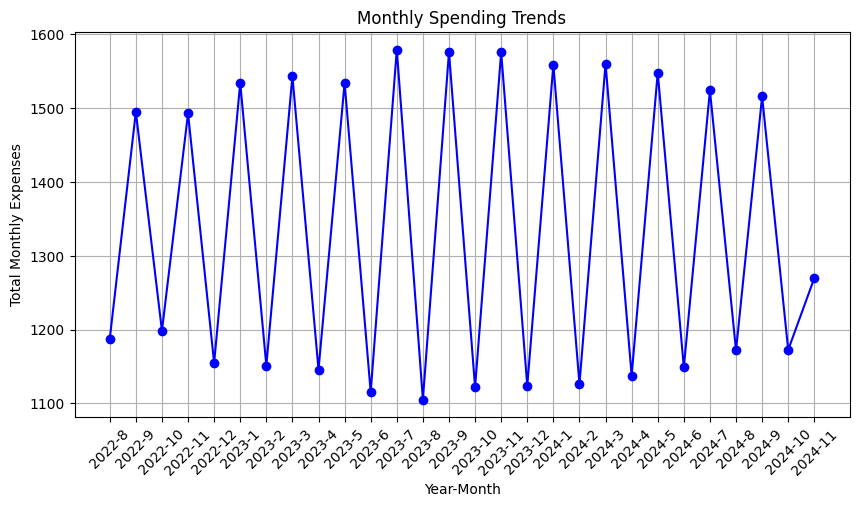

In [25]:
# Group by year and month to calculate monthly expenses
monthly_expenses = df[df['AmountType'] == 'Expense'].groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Create a new 'Year-Month' column for a continuous time series format
monthly_expenses['Year-Month'] = monthly_expenses['Year'].astype(str) + '-' + monthly_expenses['Month'].astype(str)

# Plot monthly expenses
plt.figure(figsize=(10, 5))
plt.plot(monthly_expenses['Year-Month'], monthly_expenses['Amount'], marker='o', color='blue')
plt.xlabel('Year-Month')
plt.ylabel('Total Monthly Expenses')
plt.title('Monthly Spending Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Insights from Monthly Spending Trends

1. ##### Consistent Spending Pattern:
The graph shows a recurring pattern, with monthly expenses fluctuating between approximately 1200 and 1500. This suggests that the spending remains within a stable range, possibly close to the monthly budget cap.

2. ##### Seasonal or Monthly Peaks:
The expenses appear to reach a peak around the middle of each month, followed by a dip towards the end of the month. This could be due to recurring bills (such as utilities) that are typically paid early in the month, with non-essential spending reduced later on.

3. ##### Spending Cycles:
The regularity of the peaks and valleys could indicate a cycle in spending habits, possibly aligned with paydays or recurring bills. This could be an area to investigate further to confirm if fixed expenses are concentrated at specific points in the month.

4. ##### Anomalies:
There is a slight increase in monthly expenses during certain months, but no significant spikes, which indicates no major unexpected expenses. However, occasional dips might suggest periods with minimal non-essential spending or potential savings.

### 3. Essential vs. Non-Essential Spending

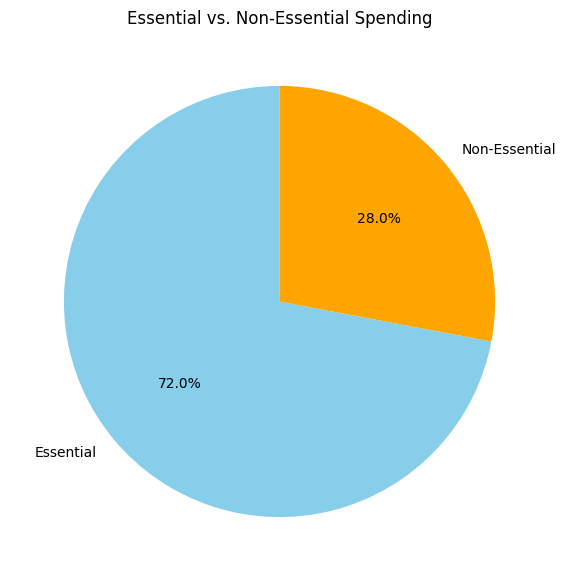

In [23]:
# Calculate total for essential and non-essential expenses
expense_type_totals = df[df['AmountType'] == 'Expense'].groupby('ExpenseType')['Amount'].sum()

# Plot essential vs. non-essential spending as a pie chart
plt.figure(figsize=(7, 7))
expense_type_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Essential vs. Non-Essential Spending')
plt.ylabel('')  # Hides the y-axis label
plt.show()

Insights from Essentail vs Non-Essentail

With nearly three-quarters of expenses going toward essentials, there may be limited room for adjustments in the essential category. However, monitoring and managing non-essential expenses could provide an opportunity to save more without significantly impacting daily needs.

### 4. Category-wise Spending Breakdown

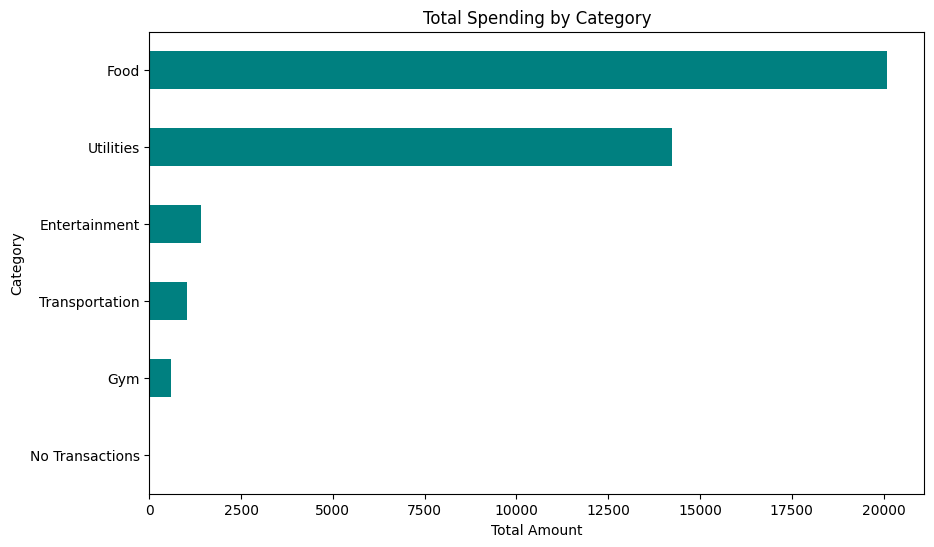

In [24]:
# Calculate total spending per category
category_totals = df[df['AmountType'] == 'Expense'].groupby('Category')['Amount'].sum().sort_values()

# Plot category-wise spending as a horizontal bar chart
plt.figure(figsize=(10, 6))
category_totals.plot(kind='barh', color='teal')
plt.xlabel('Total Amount')
plt.title('Total Spending by Category')
plt.show()

Insights from Total Spending by Category

1. ##### Food as the Largest Expense:
Food is the highest spending category, with total expenses significantly exceeding other categories. This could indicate a priority on groceries and possibly dining out.
Given that food is a regular essential expense, it’s expected to take up a significant portion of the budget. However, there may be opportunities to optimize here if some of this spending includes non-essential dining.

2. ##### Utilities as a Major Category:
Utilities rank second in total spending, indicating substantial recurring costs for items like rent, electricity, water, and internet bills.
This is a typical essential expense that is less flexible, but the user could look into ways to manage utility consumption to reduce costs if needed.

3. ##### Lower Spending on Entertainment, Transportation, and Gym:
Entertainment and Transportation expenses are relatively low, suggesting limited discretionary spending.
Gym expenses are the smallest among listed categories, which could imply that the gym membership is affordable or that it’s not heavily used.

4. ##### 'No Transactions':
The presence of No Transactions in this chart indicates days with no expenses recorded, which suggests days of potential savings or minimal spending.

### 5. Monthly Income vs. Expense with Savings Calculation

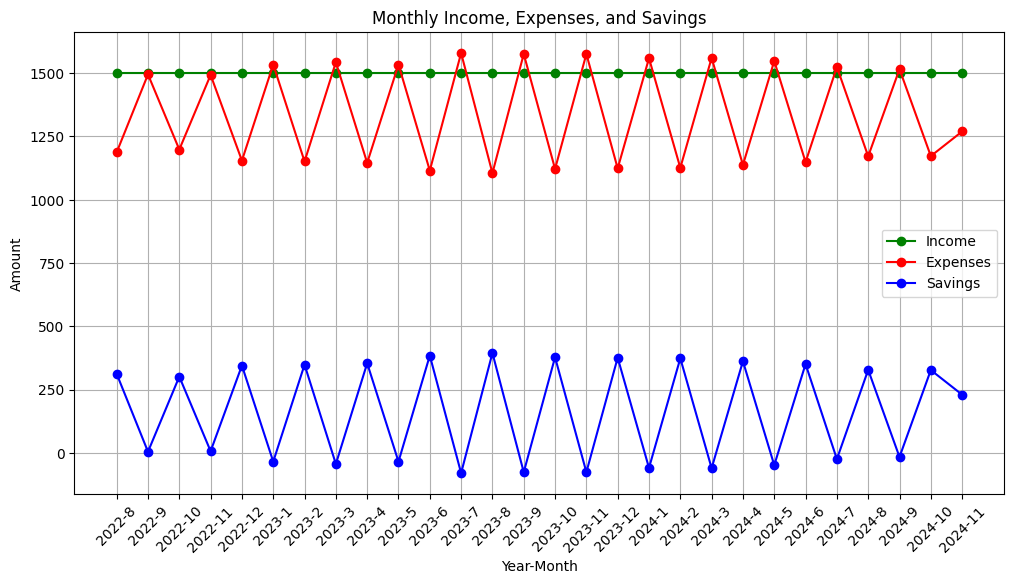

In [27]:
# Calculate monthly income and expenses
monthly_income = df[df['AmountType'] == 'Income'].groupby(['Year', 'Month'])['Amount'].sum()
monthly_expenses = df[df['AmountType'] == 'Expense'].groupby(['Year', 'Month'])['Amount'].sum()

# Calculate monthly savings as Income - Expenses
monthly_savings = monthly_income - monthly_expenses

# Combine into a DataFrame for visualization
savings_df = pd.DataFrame({
    'Income': monthly_income,
    'Expenses': monthly_expenses,
    'Savings': monthly_savings
}).reset_index()

# Create a 'Year-Month' column for clear x-axis labels
savings_df['Year-Month'] = savings_df['Year'].astype(str) + '-' + savings_df['Month'].astype(str)

# Plot Monthly Income, Expenses, and Savings
plt.figure(figsize=(12, 6))
plt.plot(savings_df['Year-Month'], savings_df['Income'], label='Income', color='green', marker='o', linestyle='-')
plt.plot(savings_df['Year-Month'], savings_df['Expenses'], label='Expenses', color='red', marker='o', linestyle='-')
plt.plot(savings_df['Year-Month'], savings_df['Savings'], label='Savings', color='blue', marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.title('Monthly Income, Expenses, and Savings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Insights from Monthly Income, Expenses, and Savings

1. ##### Stable Income
2. ##### Fluctuating Expenses:
The Expenses line (in red) fluctuates significantly each month. This pattern could be due to varying essential and non-essential expenses.
The monthly dips and peaks in expenses might align with certain periods of higher spending (such as utility bills or occasional non-essential expenses).

3. ##### Savings Patterns:
The Savings line (in blue) follows the expense trend inversely, as savings increase when expenses decrease and vice versa.
In some months, savings drop to very low levels, indicating that expenses nearly match income. This suggests a need for careful budgeting, especially during high-expense months, to ensure that savings remain positive.

4. ##### Overall Financial Health:
Despite the fluctuations, there are savings every month, which indicates that income consistently exceeds expenses.
The cyclic nature of savings and expenses implies a predictable rhythm, which could be beneficial for making adjustments to maintain or improve savings.

Actionable Insights
Expense Management: By understanding which months have higher expenses, efforts can be made to manage discretionary spending, especially during those months.
Savings Optimization: Identifying high-expense months and planning in advance could help smooth out savings, ensuring a more balanced distribution across the year.

### 6. Yearly Essential vs. Non-Essential Spending Trend

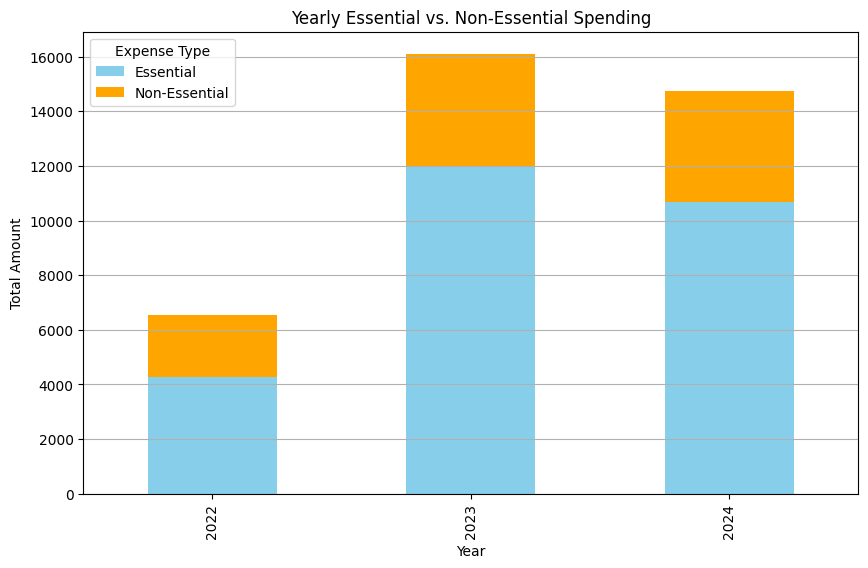

In [29]:
import matplotlib.pyplot as plt

# Group by year and expense type, then sum the amounts for each group
yearly_spending = df[df['AmountType'] == 'Expense'].groupby(['Year', 'ExpenseType'])['Amount'].sum().unstack()

# Plot a stacked bar chart for yearly essential vs non-essential spending
plt.figure(figsize=(10, 6))
yearly_spending.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Yearly Essential vs. Non-Essential Spending')
plt.legend(title='Expense Type')
plt.grid(axis='y')
plt.show()

Insights from Yearly Essential vs. Non-Essential Spending

1. ##### Growth in Total Spending:
Total spending has increased from 2022 to 2023 but appears to have slightly decreased in 2024.
This suggests that spending might be stabilizing or that there’s a conscious effort to control expenses in 2024.

2. ##### Essential Spending Dominance:
The Essential expenses (shown in sky blue) consistently make up the largest portion of spending each year.
This aligns with expected financial behavior, as essential costs like rent, utilities, and groceries are necessary and less flexible.

3. ##### Non-Essential Spending Variation:
Non-Essential spending (shown in orange) is significant, particularly in 2023, where it reaches a peak.
In 2024, non-essential spending appears to decrease slightly, which might suggest a more conservative approach to discretionary spending.

4. ##### Financial Balance:
The consistent but lower non-essential spending suggests a generally balanced approach to budgeting, where essential needs are prioritized, but there is room for discretionary spending. This balance is particularly evident in 2024, where essential spending is still high, but non-essential spending has been reduced compared to 2023.

Actionable Insights
Focus on Discretionary Spending: Since non-essential spending peaked in 2023, it may be beneficial to review this category to ensure that discretionary spending is adding value and not negatively impacting savings.
Optimizing Essential Expenses: Although essential expenses are mostly fixed, exploring ways to reduce utility bills or grocery expenses could free up funds for savings or other priorities.

### 7. Monthly Spending Heatmap by Day of the Week

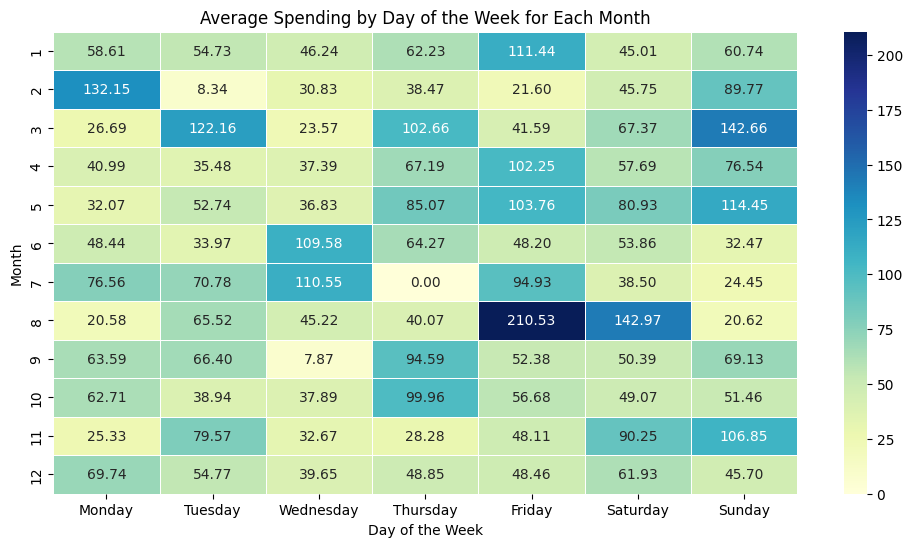

In [32]:
# Group by Month and DayOfWeek, then calculate the average daily spending
weekday_spending = df[df['AmountType'] == 'Expense'].groupby(['Month', 'DayOfWeek'])['Amount'].mean().unstack()

# Ensure the DayOfWeek is ordered correctly (from Monday to Sunday)
weekday_spending = weekday_spending[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plot a heatmap of spending by day of the week
plt.figure(figsize=(12, 6))
sns.heatmap(weekday_spending, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Average Spending by Day of the Week for Each Month')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

Insights from Daily Spending Heatmap

1. ##### Higher Spending on Weekends:
There is a noticeable trend of higher spending on Saturdays and Sundays for certain months, such as August (Month 8) and February (Month 2). This could indicate that weekends are used for activities like dining out, shopping, or other discretionary spending.

2. ##### Weekday Spending Patterns:
Fridays also show elevated spending in some months, possibly due to end-of-week activities or preparation for the weekend.
On weekdays, spending tends to be lower, which might suggest that expenses are primarily focused on essentials rather than discretionary activities.

3. ##### Monthly Fluctuations:
In specific months like February (Month 2) and July (Month 7), spending on certain weekdays (like Tuesday and Thursday) appears higher, possibly due to recurring expenses such as bills, subscriptions, or utilities.
The highest value appears in August on Saturday (210.53), suggesting a specific event or higher-than-usual spending on that day.

4. ##### Consistent Low-Spending Days:
Mondays and Wednesdays generally show lower spending, which aligns with typical weekly patterns where people might be more focused on work or daily routines rather than discretionary activities.
These low-spending days contribute to balancing out the overall weekly budget, making the high-spending weekend days less impactful.

5. ##### Seasonal Variation:
There is some variation across months, indicating possible seasonal changes in spending habits, such as higher spending during certain months or specific days for seasonal events or holidays.

Actionable Insights
Weekend Budgeting: Since weekends are high-spending days, allocating a specific weekend budget could help manage discretionary expenses.
Identify Recurring Expenses: Notable weekday spending in some months could be examined to see if these are recurring bills or subscriptions, which might be adjusted to lower costs.
Optimize Low-Spending Days: Using low-spending days (like Mondays and Wednesdays) for necessary but manageable expenses can help balance out high-spending days.

### 8. Cumulative Spending and Income Comparison

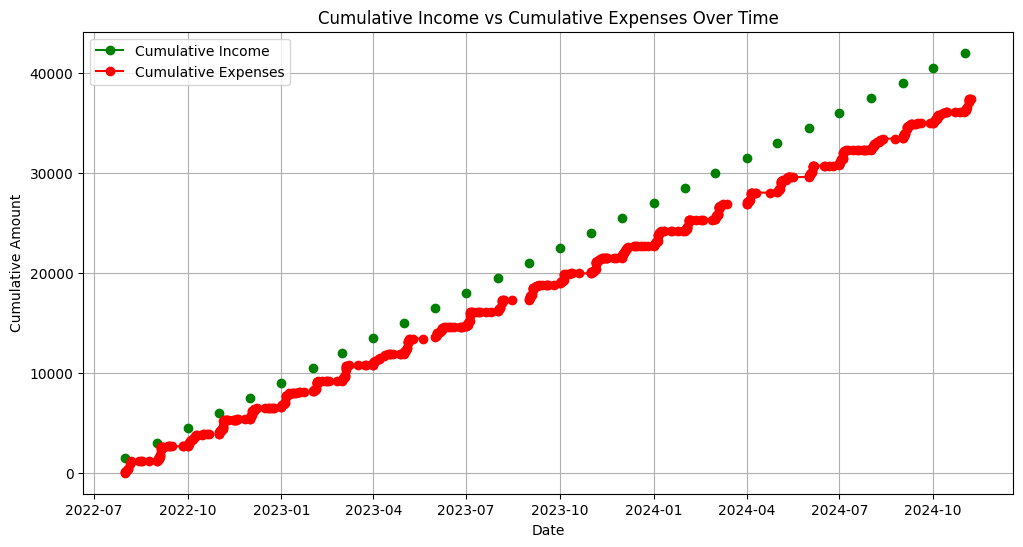

In [33]:
# Sort the data by date to ensure cumulative calculations are sequential
df = df.sort_values('Date')

# Calculate cumulative income and cumulative expenses over time
df['Cumulative Income'] = df[df['AmountType'] == 'Income']['Amount'].cumsum()
df['Cumulative Expenses'] = df[df['AmountType'] == 'Expense']['Amount'].cumsum()

# Plot cumulative income vs expenses
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative Income'], label='Cumulative Income', color='green', linestyle='-', marker='o')
plt.plot(df['Date'], df['Cumulative Expenses'], label='Cumulative Expenses', color='red', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount')
plt.title('Cumulative Income vs Cumulative Expenses Over Time')
plt.legend()
plt.grid(True)
plt.show()

Insights from Cumulative Income vs. Cumulative Expenses Over Time

1. ##### Consistent Income Surplus:
Cumulative income (green line) is consistently above cumulative expenses (red line), indicating positive cash flow and a steady savings accumulation.

2. ##### Close Gaps at Times:
There are periods where cumulative expenses closely approach cumulative income, suggesting higher spending that could impact long-term savings if it continues.

3. ##### Sustainable Financial Health:
The gap between income and expenses indicates healthy finances, with sufficient room for saving over time.

This trend reflects a generally sustainable financial approach, but keeping expenses in check can help maximize savings.

## 5. Predictive Modeling

Objective:
To build a model that can accurately forecast monthly expenses. This can help in predicting future cash flow needs, identifying potential high-expense months, and making better budgeting decisions.

###### Modeling Approach
For time-series forecasting, there are several popular approaches.

1. ##### Moving Average (MA) and Exponential Smoothing:
* Why Considered: These methods are straightforward for smoothing and detecting trends.
* Why Not Used: They do not capture seasonality or complex patterns over time, which are likely present in expenses due to monthly cycles.

2. ##### ARIMA (AutoRegressive Integrated Moving Average):
* Why Considered: ARIMA is a robust choice for time-series data and can model trends, seasonality, and autocorrelation (relationships between previous and current data points).
* Why Suitable: ARIMA is effective for time-series data with consistent intervals and no strong seasonal component, making it suitable for monthly expenses, especially if the expense pattern is linear or mildly cyclical.
* Why Not Used Directly: ARIMA does not handle seasonality inherently. To account for seasonal variations, we would need SARIMA (Seasonal ARIMA).

3. ##### SARIMA (Seasonal ARIMA):
* Why Suitable: SARIMA extends ARIMA by adding parameters for seasonality. It’s ideal for our data since expenses likely have monthly or quarterly fluctuations.
* Why Selected: SARIMA can model both short-term and seasonal effects, making it a balanced choice for monthly expense forecasting.

4. ##### Facebook Prophet:
* Why Considered: Prophet is known for handling missing data and irregular time-series data effectively and is designed for data with daily or weekly seasonality.
* Why Not Used: Prophet is more suitable for datasets with strong holiday effects or irregular intervals, which doesn’t align well with our regular monthly data.

##### Conclusion: I will be using SARIMA for expense forecasting as it provides a good balance between trend and seasonality handling.

#### Modeling with SARIMA (Seasonal ARIMA)

* ##### Data Preparation:
First, we need to aggregate expenses by month to create a monthly time-series dataset.
Ensure the data is indexed by date to fit into the SARIMA model format.

* ##### Parameter Selection:
SARIMA has several parameters that control trend and seasonality:
(p, d, q): ARIMA terms that capture autoregression (p), integration (d), and moving average (q).
(P, D, Q, s): Seasonal terms that capture seasonal autoregression (P), seasonal differencing (D), seasonal moving average (Q), and season length (s).
We’ll use auto-selection techniques (like AIC) to determine optimal values or experiment with a few combinations based on expense patterns.

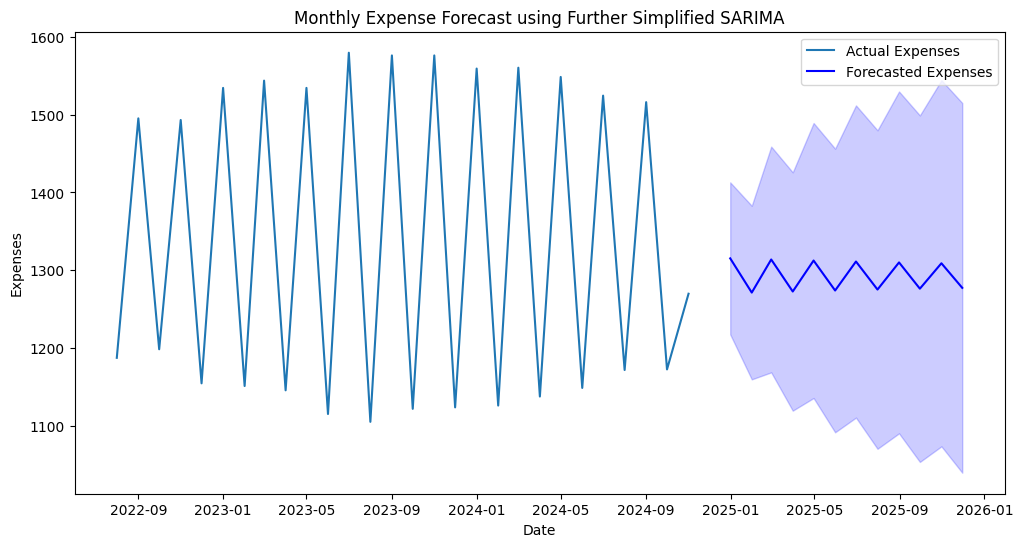

In [37]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Aggregate monthly expenses and set frequency explicitly
monthly_expenses = df[df['AmountType'] == 'Expense'].groupby(['Year', 'Month'])['Amount'].sum()
monthly_expenses.index = pd.to_datetime(monthly_expenses.index.map(lambda x: f"{x[0]}-{x[1]:02d}")).to_period('M').to_timestamp()

# SARIMA model with seasonal order adjustment if needed
sarima_model = SARIMAX(monthly_expenses, order=(1, 1, 1), seasonal_order=(0, 0, 0, 12))
sarima_results = sarima_model.fit()

# Forecast for the next 12 months
forecast = sarima_results.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_expenses.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot actual expenses and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_expenses, label='Actual Expenses')
plt.plot(forecast_index, forecast_mean, label='Forecasted Expenses', color='blue')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='blue', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Expenses')
plt.title('Monthly Expense Forecast using Further Simplified SARIMA')
plt.legend()
plt.show()

Interpreting the Forecast

1. ##### Forecasted Expense Pattern:
The forecasted expenses (blue line) show a fairly stable pattern, reflecting the past trends in monthly expenses.
Seasonal fluctuations are still visible, albeit simplified, indicating periodic high and low spending months.

2. ##### Confidence Interval:
The shaded area around the forecasted line represents the confidence interval, which widens over time due to increased uncertainty.
This interval provides a range within which the actual expenses are expected to fall, allowing for more realistic budget planning.

Actionable Insights
* Budgeting Stability: The relatively stable forecast suggests that expenses are consistent, allowing for predictable budgeting and planning.
* Potential Variability: The widening confidence interval in later months implies greater variability, which is common in long-term forecasts.